# GRADIENT DESCENT ALGORITHM

**Gradient descent** *is an optimization algorithm used to minimize some cost function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.*

![Gradient Descent Overview](an-overview-of-gradient-descent-optimization-algorithms-6-638.jpg)


## Gradient Descent Procedure
*The procedure starts off with initial values for the coefficient or coefficients for the function. These could be 0.0 or a small random value.
The cost of the coefficients is evaluated by plugging them into the function and calculating the cost*: **cost = f(coefficient)**

*The derivative of the cost is calculated. The derivative is a concept from calculus and refers to the slope of the function at a given point. We need to know the slope so that we know the direction (sign) to move the coefficient values in order to get a lower cost on the next iteration*: **delta = derivative(cost).**

*Now that we know from the derivative which direction is downhill, we can now update the coefficient values. A learning rate parameter (alpha) must be specified that controls how much the coefficients can change on each update*: **coefficient = coefficient – (alpha * delta)**

**NOTE: This process is repeated until the cost of the coefficients (cost) is 0.0 or close enough to zero to be good enough.**



In [9]:
using DataFrames
using CSV
using Plots
using Random

f(x, y) = 3*(x-4)^2 + y^2
∇f(x, y) = [6*(x-4), 2*y]

∇f (generic function with 1 method)

In [33]:
data = CSV.read("Advertising.csv", DataFrame);

In [34]:
x_data = data.newspaper
y_data = data.sales

data_tuples = [x for x in zip(x_data, y_data)]

200-element Array{Tuple{Float64,Float64},1}:
 (69.2, 22.1)
 (45.1, 10.4)
 (69.3, 9.3)
 (58.5, 18.5)
 (58.4, 12.9)
 (75.0, 7.2)
 (23.5, 11.8)
 (11.6, 13.2)
 (1.0, 4.8)
 (21.2, 10.6)
 (24.2, 8.6)
 (4.0, 17.4)
 (65.9, 9.2)
 ⋮
 (3.7, 15.9)
 (23.4, 6.7)
 (5.8, 10.8)
 (6.0, 9.9)
 (31.6, 5.9)
 (3.6, 19.6)
 (6.0, 17.3)
 (13.8, 7.6)
 (8.1, 9.7)
 (6.4, 12.8)
 (66.2, 25.5)
 (8.7, 13.4)

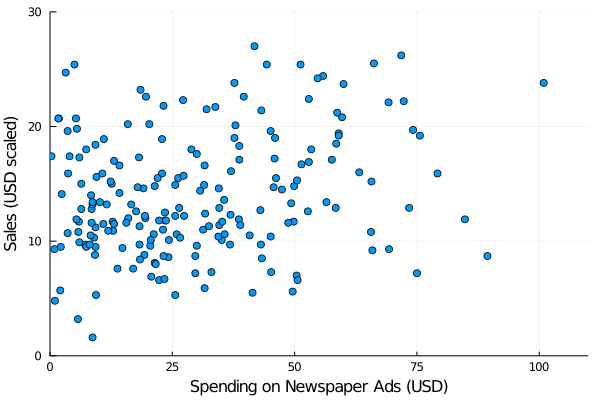

In [35]:
scatter(data_tuples,
        xlim = (0,110),
        ylim = (0, 30),
        xaxis = "Spending on Newspaper Ads (USD)",
        yaxis = "Sales (USD scaled)",
        legend = false)

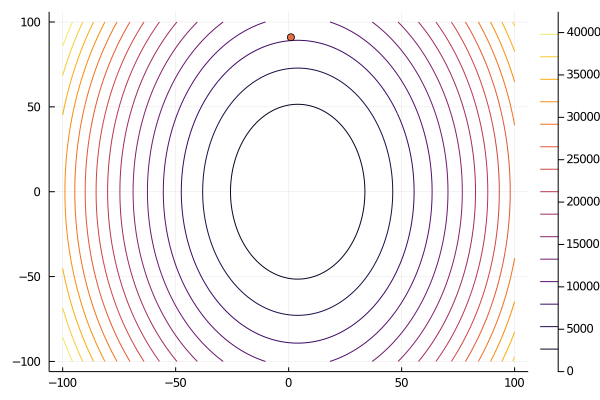

In [36]:
x = -100:0.5:100
y = -100:0.5:100

p1 = contour(x, y, f)
plot(p1, legend = false)
x0 = [-1, 4]
scatter!([f(x0[1], x0[2])])

---

For our learning purpose we will visualize the contour plot of $f(x,y)$ as well as the three dimensional plot. The code cell below demonstrates how to plot this way.

---

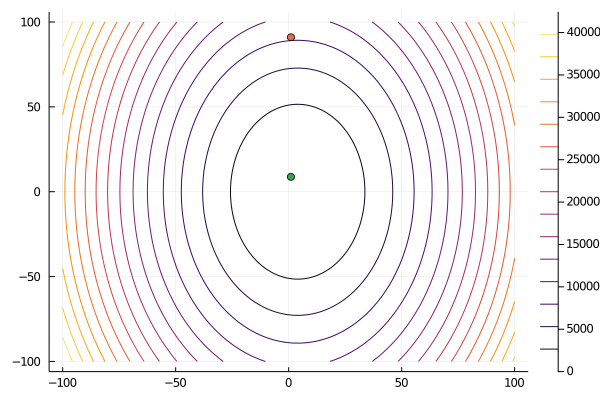

In [37]:
x1 = x0 - 0.2*∇f(x0[1], x0[2])
scatter!([f(x1[1], x1[2])])

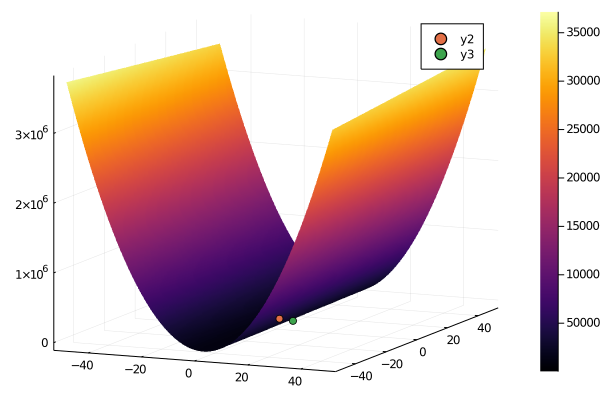

In [39]:
C(w,b) = (1/length(x_data))*sum([(y_data[i] - (w*x_data[i] + b))^2 for i = 1:length(x_data)])

w = -50:0.5:50
b = -50:0.5:50

plot(w, b, C, st = :surface)
scatter!([(x0[1], x0[2], f(x0[1], x0[2]))])
scatter!([(x1[1], x1[2], f(x1[1], x1[2]))])


*The evaluation of how close a fit a machine learning model estimates the target function can be calculated a number of different ways, often specific to the machine learning algorithm. The cost function/function involves evaluating the coefficients in the machine learning model by calculating a prediction for the model for each training instance in the dataset and comparing the predictions to the actual output values and calculating a sum or average error (such as the Sum of Squared Residuals or SSR in the case of linear regression).*

*The cost/coefficient is calculated for a machine learning algorithm over the entire training dataset for each iteration of the gradient descent algorithm. One iteration of the algorithm is called one batch and this form of gradient descent is referred to as batch gradient descent; which will be illustrated below.*

In [40]:
function batch_gradient_descent(x_data, y_data, w, b, α)
    N = length(x_data)
    
    w = w - (-2/N)*α*sum([x_data[i]*(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    b = b - (-2/N)*α*sum([(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    
    return w,b
end

function batch_train(x_data, y_data, w, b, α, epochs)
    for i = 1:epochs
        w, b = batch_gradient_descent(x_data, y_data, w, b, α)
        
        if i == 1
            println(" Epoch ", i, "with cost: ", C(w, b))
        end
        
        if i == 100
            println(" Epoch ", i, "with cost: ", C(w, b))
        end
        
        if i == 1000
            println(" Epoch ", i, "with cost: ", C(w, b))
        end
        
        if i == 10000
            println(" Epoch ", i, "with cost: ", C(w, b))
        end
        
        if i == 100000
            println(" Epoch ", i, "with cost: ", C(w, b))
        end
    end
    
    return w, b
end
        

batch_train (generic function with 1 method)

 Epoch 1with cost: 215.57079087210658
 Epoch 100with cost: 77.26363814235661
 Epoch 1000with cost: 76.16108750897499
 Epoch 10000with cost: 70.4150347681407


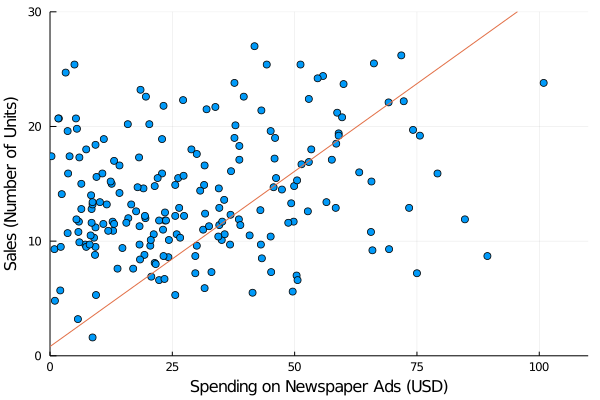

In [41]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 10000)

scatter(data_tuples,
        xlim = (0,110),
        ylim = (0, 30),
        xaxis = "Spending on Newspaper Ads (USD)",
        yaxis = "Sales (Number of Units)",
        legend = false)
plot!(x-> x*w + b, xlim = (0, 110),
          ylim = (0, 30),
          legend = false)

## Stochastic Gradient Descent for Machine Learning
*Gradient descent can be slow to run on very large datasets. This is because one iteration of the gradient descent algorithm requires a prediction for each instance in the training dataset, it can take a long time when you have many millions of instances.*

*In situations when you have large amounts of data, you can use a variation of gradient descent called* **stochastic gradient descent.**

*In this variation, the gradient descent procedure described above is run but the update to the coefficients is performed for each training instance, rather than at the end of the batch of instances.*

*The first step of the procedure requires that the order of the training dataset is randomized. This is to mix up the order that updates are made to the coefficients. Because the coefficients are updated after every training instance, the updates will be noisy jumping all over the place, and so will the corresponding cost function. By mixing up the order for the updates to the coefficients, it harnesses this random walk and avoids it getting distracted or stuck.*

*The update procedure for the coefficients is the same as that above, except the cost is not summed over all training patterns, but instead calculated for one training pattern.*

*The learning can be much faster with stochastic gradient descent for very large training datasets and often you only need a small number of passes through the dataset to reach a good or good enough set of coefficients, e.g. 1-to-10 passes through the dataset.*



In [42]:
function stochastic_gradient_descent(x_data, y_data, w, b, α)
    N = length(x_data)
    
    i = rand([k for k = 1:N])
    
    w = w - (-2/N)*α*x_data[i]*(y_data[i] - (w*x_data[i] + b)) 
    b = b - (-2/N)*α*(y_data[i] - (w*x_data[i] + b))
    
    return w,b
end

function stochastic_train(x_data, y_data, w, b, α, epochs)
    for i = 1:epochs
        w, b = batch_gradient_descent(x_data, y_data, w, b, α)
        
        if i == 1
            println(" Epoch ", i, "with cost: ", C(w, b))
        end
        
        if i == 100
            println(" Epoch ", i, "with cost: ", C(w, b))
        end
        
        if i == 1000
            println(" Epoch ", i, "with cost: ", C(w, b))
        end
        
        if i == 10000
            println(" Epoch ", i, "with cost: ", C(w, b))
        end
        
        if i == 100000
            println(" Epoch ", i, "with cost: ", C(w, b))
        end
    end
    
    return w, b
end
        

stochastic_train (generic function with 1 method)

 Epoch 1with cost: 215.57079087210658
 Epoch 100with cost: 77.26363814235661


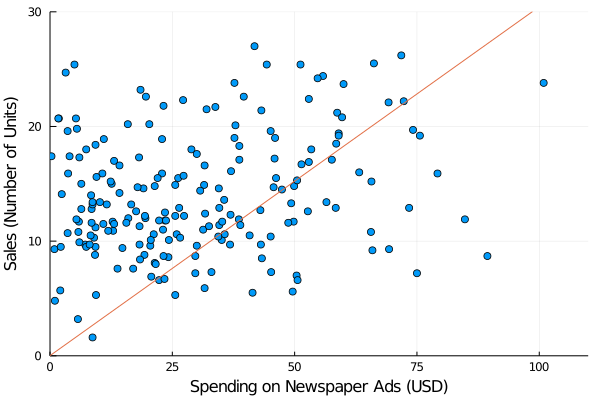

In [44]:
w, b = stochastic_train(x_data, y_data, 0.0, 0.0, 0.00001, 100)

scatter(data_tuples,
        xlim = (0,110),
        ylim = (0, 30),
        xaxis = "Spending on Newspaper Ads (USD)",
        yaxis = "Sales (Number of Units)",
        legend = false)
plot!(x-> x*w + b, xlim = (0, 110),
          ylim = (0, 30),
          legend = false)

 Epoch 1with cost: 215.57079087210658
 Epoch 100with cost: 77.26363814235661
 Epoch 1000with cost: 76.16108750897499


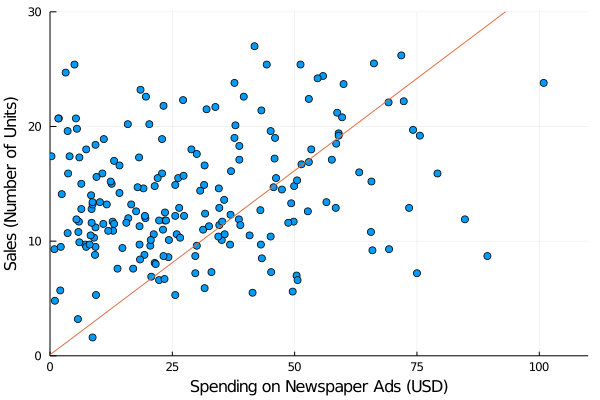

In [45]:
w, b = stochastic_train(x_data, y_data, 0.0, 0.0, 0.00001, 1000)

scatter(data_tuples,
        xlim = (0,110),
        ylim = (0, 30),
        xaxis = "Spending on Newspaper Ads (USD)",
        yaxis = "Sales (Number of Units)",
        legend = false)
plot!(x-> x*w + b, xlim = (0, 110),
          ylim = (0, 30),
          legend = false)

 Epoch 1with cost: 215.57079087210658
 Epoch 100with cost: 77.26363814235661
 Epoch 1000with cost: 76.16108750897499
 Epoch 10000with cost: 70.4150347681407


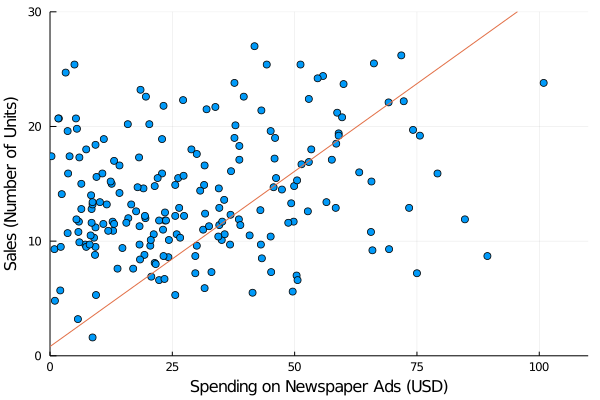

In [46]:
w, b = stochastic_train(x_data, y_data, 0.0, 0.0, 0.00001, 10000)

scatter(data_tuples,
        xlim = (0,110),
        ylim = (0, 30),
        xaxis = "Spending on Newspaper Ads (USD)",
        yaxis = "Sales (Number of Units)",
        legend = false)
plot!(x-> x*w + b, xlim = (0, 110),
          ylim = (0, 30),
          legend = false)